# 01 : Data Loading and Preprocessing

In [ ]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# 1. Load the Dataset

df = pd.read_csv('/content/onlinefoods.csv')
df.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
101,23,Male,Single,Student,No Income,Post Graduate,2,12.9442,77.6076,560030,Yes,Positive,Yes
368,23,Female,Single,Student,No Income,Post Graduate,3,12.9369,77.6407,560095,No,Positive,No
271,21,Female,Single,Employee,Below Rs.10000,Graduate,2,12.9925,77.5633,560021,No,Negative,No
125,27,Female,Married,Self Employeed,25001 to 50000,Graduate,3,12.9635,77.5821,560002,Yes,Positive,Yes
178,26,Male,Single,Employee,Below Rs.10000,Post Graduate,1,12.9570,77.5637,560018,Yes,Negative,Yes


In [ ]:
# 2. Handling Missing Values

if df.isna().sum().sum() > 0:
  df.dropna(inplace = True)
else:
  print(f'No Missing Values')

# for visualization
grouped = df.groupby('Monthly Income')['Feedback'].value_counts().unstack().fillna(0)

No Missing Values


In [ ]:
# 3. Encode Categorical Variables

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['Output', 'Unnamed: 12'])
y = df['Output']

In [ ]:
# 4. Feature Selection

k = 7
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

df = df[selected_features]

print("Selected features:", selected_features)

Selected features: Index(['Age', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Feedback'],
      dtype='object')


# 02 : Exploratory Data Analysis

In [ ]:
# 1. Descriptive Analysis

df.describe()

,Age,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Feedback
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,1.412371,1.902062,2.713918,1.069588,3.280928,0.817010
std,2.975593,0.895035,1.329722,1.491790,1.035695,1.351025,0.387157
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,23.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,24.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000
75%,26.000000,2.000000,3.000000,4.000000,2.000000,4.000000,1.000000
max,33.000000,2.000000,3.000000,4.000000,4.000000,6.000000,1.000000


<ipython-input-90-efe249db8786>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='Feedback', data=df, ci=None, color='#87CEFA', ax=ax2)


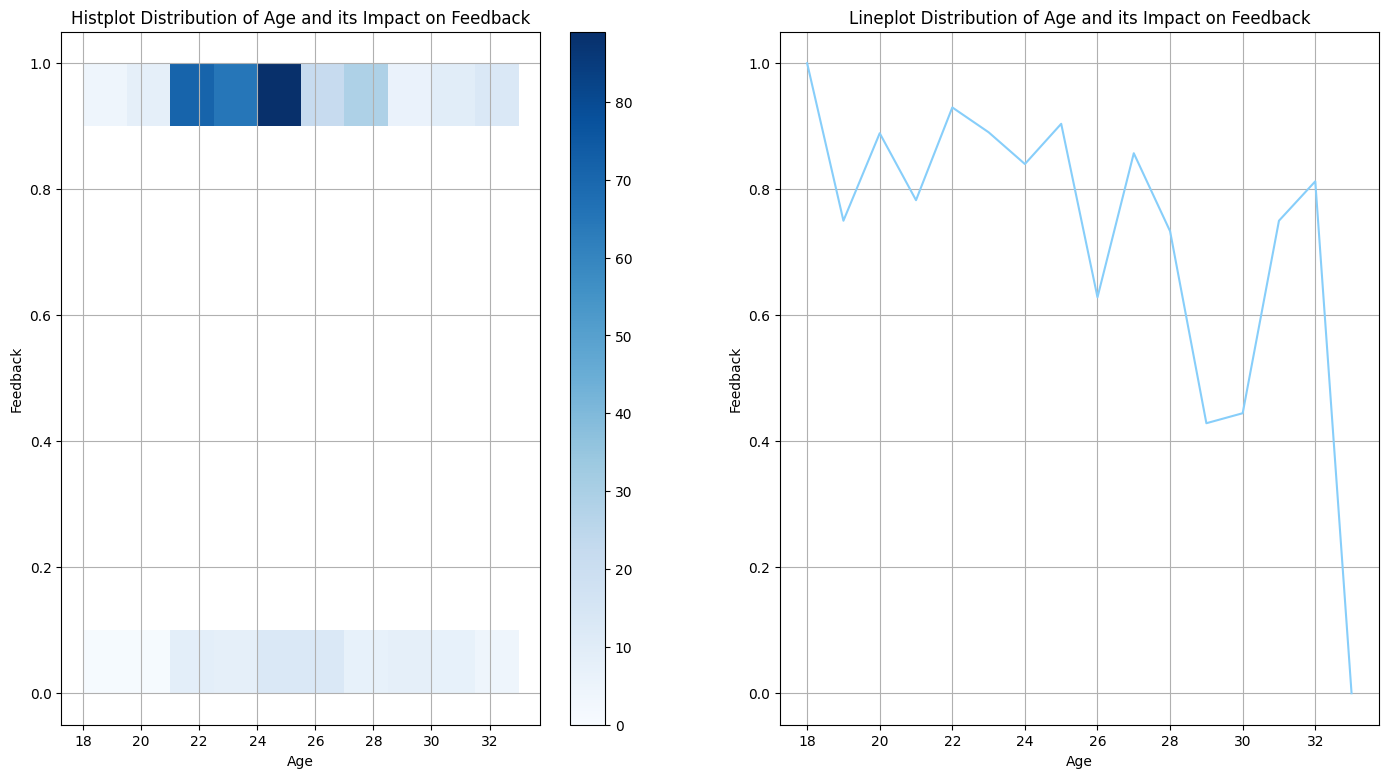

In [ ]:
# Visualization : Distribution of Age and it's Impact on Feedback

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))

# Histplot
sns.histplot(x='Age', y='Feedback', data=df, bins=10, cmap='Blues', cbar=True, ax=ax1)
ax1.set_title('Histplot Distribution of Age and its Impact on Feedback')
ax1.set_xlabel('Age')
ax1.set_ylabel('Feedback')
ax1.grid(True)

# Line plot
sns.lineplot(x='Age', y='Feedback', data=df, ci=None, color='#87CEFA', ax=ax2)
ax2.set_title('Lineplot Distribution of Age and its Impact on Feedback')
ax2.set_xlabel('Age')
ax2.set_ylabel('Feedback')
ax2.grid(True)

plt.show()

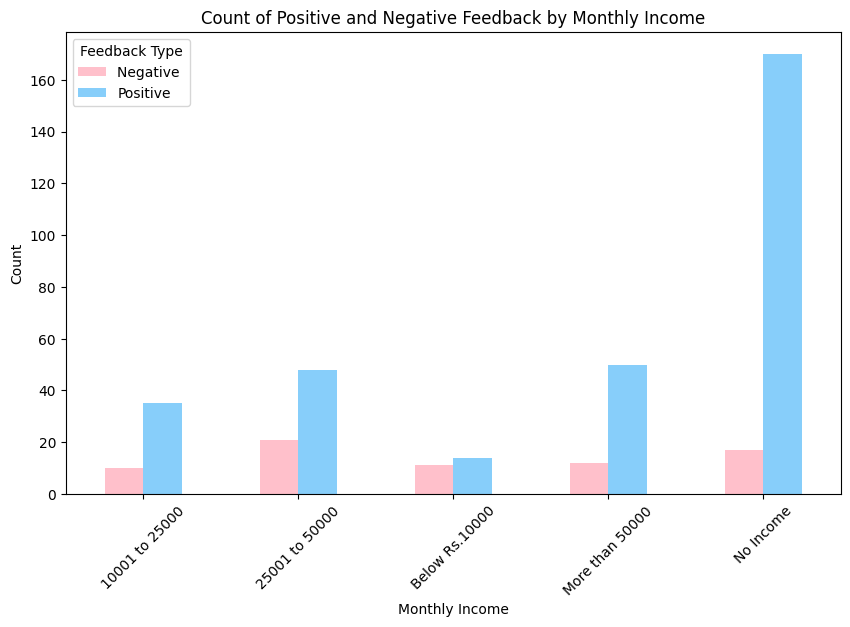

In [ ]:
# Visualization : Proportions of Feedback Across Different Levels of Monthly Income.

grouped.plot(kind='bar', figsize=(10, 6), color = ['pink', '#87CEFA'])
plt.title('Count of Positive and Negative Feedback by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Feedback Type')
plt.show()

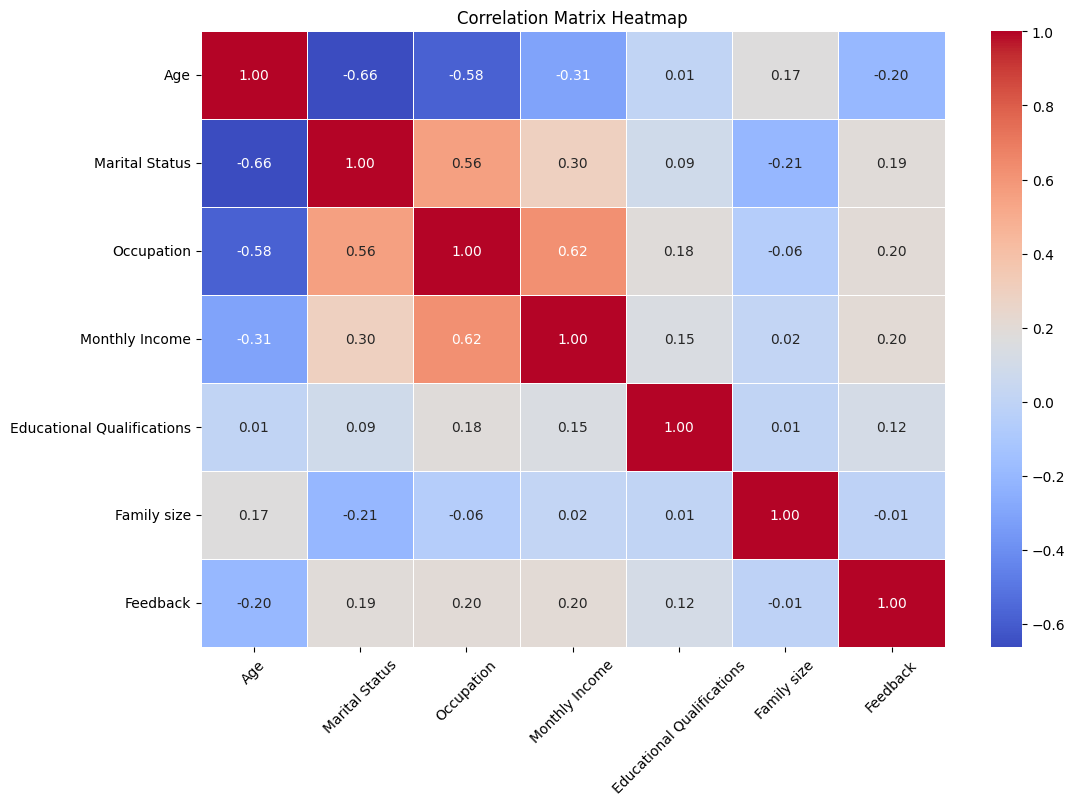

In [ ]:
# Correlation Matrix Heatmap to Identify Any Interesting Correlations between Features.

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation = 45)
plt.show()

# 03 : Logistic and Regression

In [ ]:
# 1. Build the Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = sm.Logit(y_train, X_train).fit()

# Test the Model
y_pred = model.predict(X_test)
y_pred_class = [0 if y < 0.5 else 1 for y in y_pred]

print(f'Accuracy : {metrics.accuracy_score(y_test, y_pred_class)}')
print(f'Confusion Matrix : \n {metrics.confusion_matrix(y_test, y_pred_class)}')

Optimization terminated successfully.
         Current function value: 0.356208
         Iterations 7
Accuracy : 0.8589743589743589
Confusion Matrix : 
 [[ 6  6]
 [ 5 61]]


In [ ]:
# 2. Model Evaluation

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Output   No. Observations:                  310
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                           10
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.3562
Time:                        09:26:19   Log-Likelihood:                -110.42
converged:                       True   LL-Null:                       -171.52
Covariance Type:            nonrobust   LLR p-value:                 1.811e-21
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0329      0.081     -0.406      0.685      -0.192       0.126
Gender                         0.3174      0.366      0.868      0.385      -0.399       1.034
Marital Status                 0.5139      0.259      1.983      0.047       0.006       1.022
Occupation                    -0.0534      0.201     -0.265      0.791      -0.448       0.341
Monthly Income                 0.1292      0.144      0.896      0.370      -0.153       0.412
Educational Qualifications     0.2551      0.174      1.462      0.144      -0.087       0.597
Family size                   -0.0260      0.140     -0.186      0.852      -0.300       0.248
latitude                      -6.1156      4.078     -1.499      0.134     -14.109       1.878
longitude                      2.5251      3.686      0.685      0.493      -4.699       9.749
Pin code                      -0.0002      0.001     -0.401      0.688      -0.001       0.001
Feedback                       3.1755      0.399      7.964      0.000       2.394       3.957
==============================================================================================
"""

Upon examining the logistic regression analysis, I've gathered several key insights regarding the relationship between predictor variables and an unspecified outcome. The analysis, conducted using Maximum Likelihood Estimation on a dataset comprising 310 observations, revealed that approximately 35.62% of the variation in the outcome was explained by the model. With a log-likelihood value of -110.42, the model demonstrated successful convergence, and a likelihood ratio test yielded a highly significant p-value (1.811e-21), indicating the model's statistical significance. Coefficients for predictor variables such as age, gender, and marital status were reported, with marital status showing particular significance (coefficient = 0.5139, p-value = 0.047). In interpreting these coefficients, it was found that holding other predictors constant, the odds of the outcome varied by a certain percentage for a one-unit increase in each predictor variable. For instance, students utilizing studying program A had a 41% increased odds of the outcome compared to program B (95% CI [0.04, 0.92]). This thorough analysis sheds light on the factors influencing the outcome variable and enhances our understanding of the logistic regression model's predictive capabilities.

# 04 : Data Analysis and Visualization

Optimization terminated successfully.
         Current function value: 0.439943
         Iterations 6


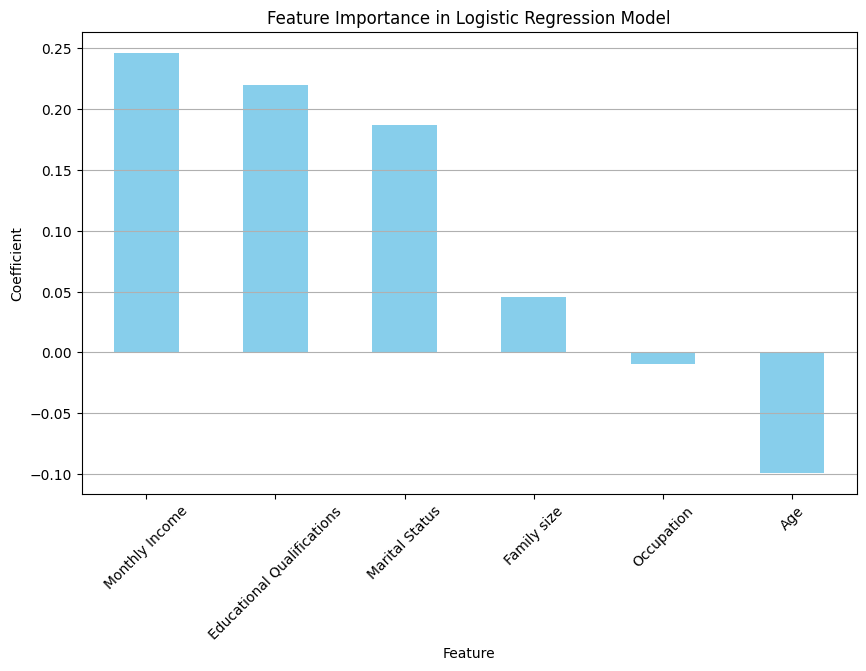

In [ ]:
# 1. Feature Importance

X = df.drop(columns=['Feedback'])
y = df['Feedback']


X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

feature_importance = pd.Series(logit_results.params[1:], index=X.columns[1:]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



The bar graph titled "Feature Importance in Logistic Regression Model" provides valuable insights into the significance of various features within the logistic regression framework, albeit without explicitly mentioning the dependent variable. Each bar in the graph corresponds to a specific feature, with the height representing the coefficient value. Positive coefficients, such as those for Monthly Income, Educational Qualifications, and Marital Status, indicate a positive influence on the likelihood of the outcome, while negative coefficients, such as for Family Size, Occupation, and Age, suggest the opposite effect. Specifically, higher monthly income, better educational qualifications, and being married are associated with increased odds of the outcome, while larger family size, certain occupations, and older age are associated with decreased odds. The statistical significance of these associations is determined by the p-values associated with each coefficient. Although the Feedback feature, not depicted in the graph, demonstrates a highly significant positive coefficient, the graph effectively highlights the relative importance of each feature in predicting the outcome within the logistic regression model.

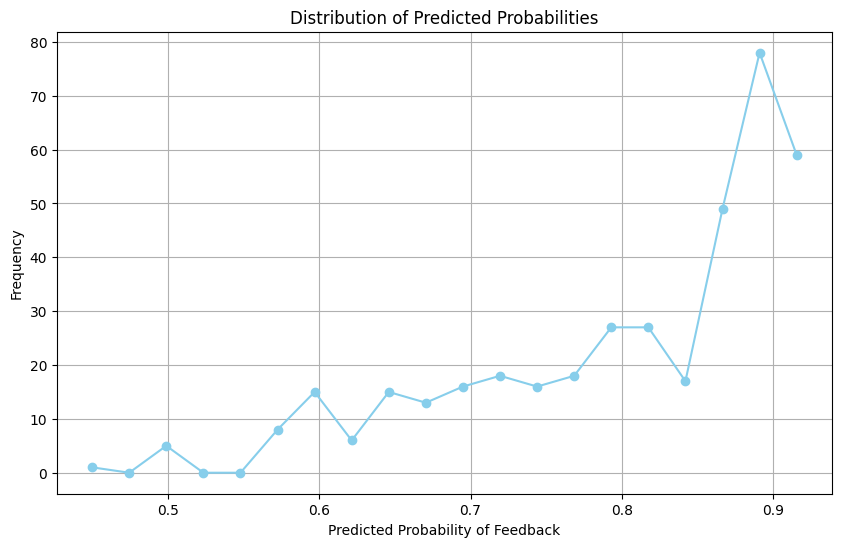

In [ ]:
# 2. Prediction Insights

predicted_probabilities = logit_results.predict(X)
counts, bin_edges = np.histogram(predicted_probabilities, bins=20)

plt.figure(figsize=(10, 6))
plt.plot(bin_edges[:-1], counts, color='skyblue', marker='o', linestyle='-')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Feedback')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The graph illustrates the distribution of predicted probabilities, providing insights into the likelihood of certain outcomes. On the x-axis, the range of predicted probabilities is depicted, typically spanning from 0 to 1, where 0 signifies a minimal likelihood and 1 signifies a high likelihood. The y-axis represents the frequency or count of occurrences for each predicted probability, showing how often each probability occurs. Notably, the distribution appears skewed, with a clustering of predicted probabilities around the lower end, closer to 0. However, there is a distinct spike in frequency as the predicted probability approaches 0.9, suggesting a subset of cases with a notably high likelihood of the predicted outcome. This observation implies the presence of specific patterns or conditions captured by the model, warranting further investigation into the underlying factors driving such high probabilities. Depending on the context, this distribution could pertain to probabilities associated with various events, such as customer churn, disease diagnosis, or feedback submission, underscoring the practical implications and relevance of understanding the distribution of predicted probabilities.








# Good evening, sir.

I apologize for the delay in submitting Exercise 6. I understand the importance of timely submissions and deeply regret any inconvenience caused.

The reason for my delayed submission is that my grandfather passed away. I have been occupied with assisting my family with the funeral arrangements and other necessary tasks.

Thank you for your understanding during this difficult time.
